# 11과 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [3]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

In [5]:
feature = 'Advertising'

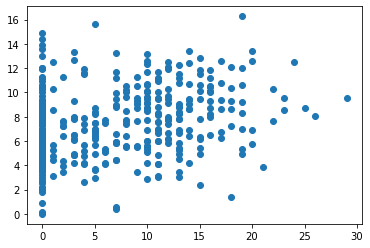

In [7]:
plt.scatter(x=feature, y=target, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


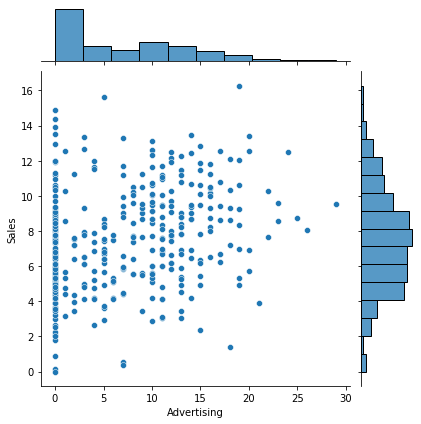

In [8]:
sns.jointplot(data[feature], data[target])
plt.show()

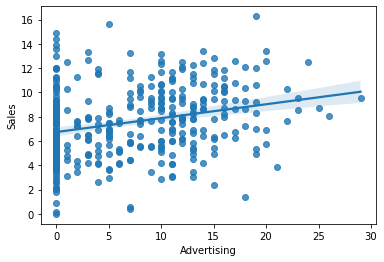

In [62]:
sns.regplot(x='Advertising', y='Sales', data=data) #산점도와 함께 직선을 그려줌
plt.show()

2) 수치화 : 상관분석

In [10]:
spst.pearsonr(data[feature], data[target])

#상관계수 0.27
#pvalue 0에 가까움
# 상관계수가 0.27인데 pvalue가 0에 가까운건 뭐지?
# 관련이 없다고 봐야하는건가

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

양의 상관관계가 있다.
그러나 강하지는 않다.


#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

In [11]:
feature = 'Population'

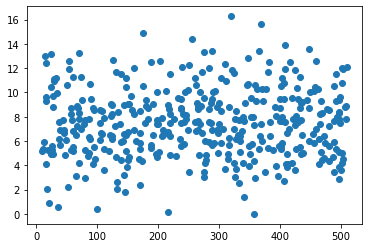

In [12]:
plt.scatter(x=feature, y=target, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


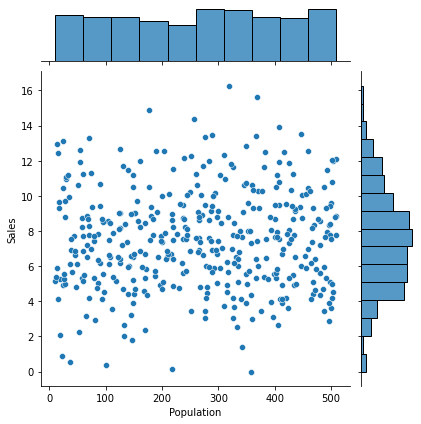

In [13]:
sns.jointplot(data[feature], data[target])
plt.show()

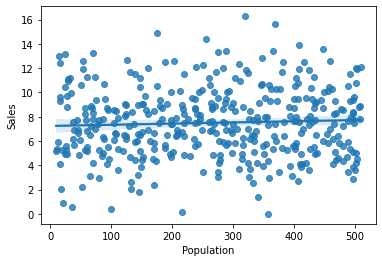

In [64]:
sns.regplot(x='Population', y='Sales', data=data)
plt.show() #쫌 애매하네

2) 수치화 : 상관분석

In [14]:
spst.pearsonr(data[feature], data[target])

# p value가 0.05보다 작아야해 => 관련없어
# 상관계수도 관련없어

(0.0504709844720392, 0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수가 약 0.05 => 관련 완전없다는건데
- pvalue가 0.3 => 이건 관련있다는건데..? (아님, 나는 기준이 0.5인줄 알았는데 0.05보다 작아야됨
    - 인구 수랑 관련이 있어야 할텐데 왜 완전 관련이 없을까?
    - 인구 수가 아닐수도있어 데이터가!

* 관련이 없다.
* 근데, 인구수가 많으면 판매량이 늘어나는 것 아닐까? 왜 관련이 없지?

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

In [26]:
print(feature, target)

Price Sales


In [25]:
feature='Price'

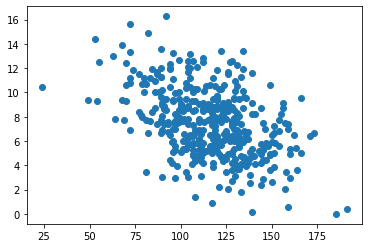

In [27]:
plt.scatter(x=feature, y=target, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


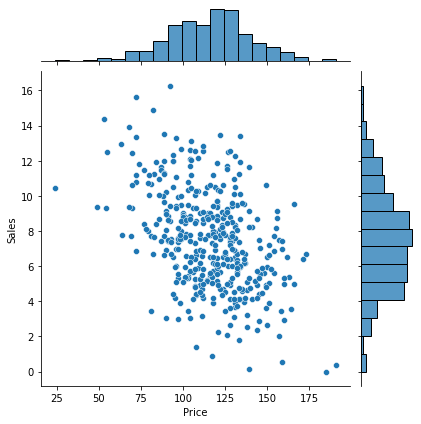

In [28]:
sns.jointplot(data[feature], data[target])
plt.show()

2) 수치화 : 상관분석

In [29]:
spst.pearsonr(data[feature], data[target])

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수 0.4 => 관련있다고 할 수 있음
- pvalue0에 수렴 => 관련있다!
- 음의 상관
- 상관계수가 좀 크네요. pvalue도 작음.



음의 상관관계가 있다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

In [30]:
feature = 'Age'

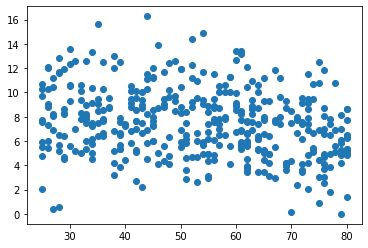

In [32]:
plt.scatter(x=feature, y=target, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


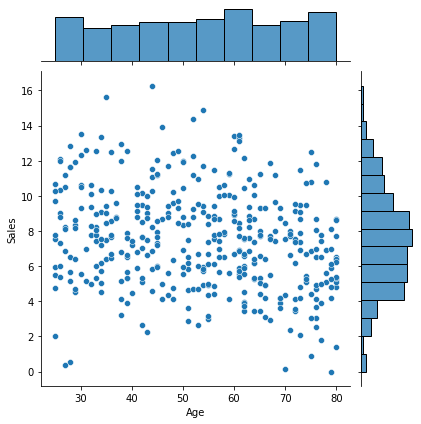

In [33]:
sns.jointplot(data[feature], data[target])
plt.show()

2) 수치화 : 상관분석

In [34]:
spst.pearsonr(data[feature], data[target])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수 0.23에 가까움
- p value 0에 가까움
- 애매함.

- 연령대 ( 평균연령이 높아질수록 판매량이 낮아진다.) 관련이 있다. 그러나 강하지는 않다.
- 강하지 않은 이유가 무엇일까? 카시트를 필요로하는 연령대가 있을텐데?

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

In [35]:
feature = 'CompPrice'

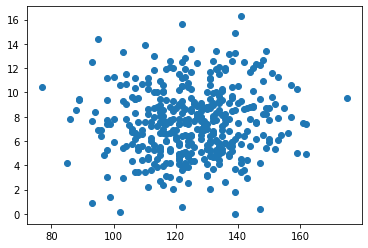

In [36]:
plt.scatter(x=feature, y=target, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


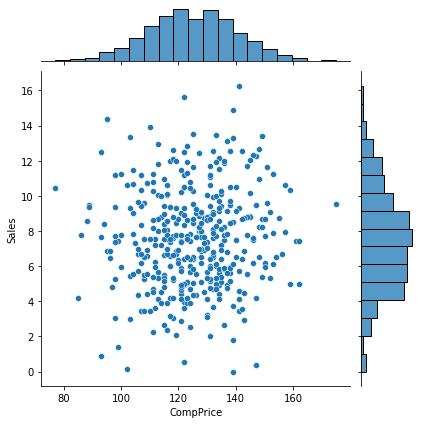

In [37]:
sns.jointplot(data[feature], data[target])
plt.show()

2) 수치화 : 상관분석

In [38]:
spst.pearsonr(data[feature], data[target])

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수 => 관련없음
- pvalue => 0.5보다 작음 => 관련없음

- 경쟁사 가격 --> 우리 판매량 관련 없다.
- 왜????
    - 고객입장에서는 가격이 문제가 아니라 가격 차이가 중요하다. 
    - 그래서 '가격 경쟁력'이라는 변수가 필요할 것임!

* 가격 경쟁력 변수 추가하기!

In [66]:
data['Price_diff'] = data['CompPrice']-data['Price']

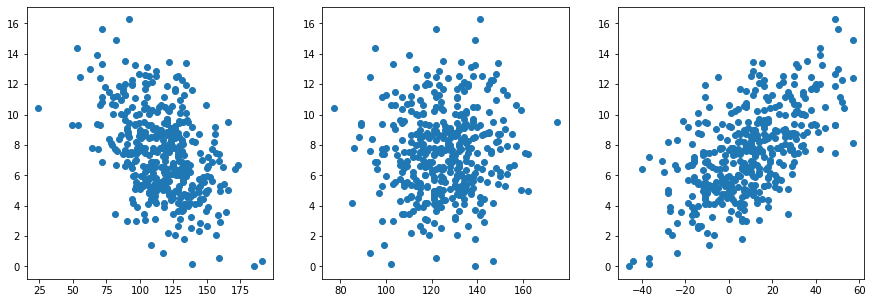

In [68]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x='Price', y='Sales', data=data)
plt.subplot(1, 3, 2)
plt.scatter(x='CompPrice', y='Sales', data=data)
plt.subplot(1, 3, 3)
plt.scatter(x='Price_diff', y='Sales', data=data)

plt.show()

In [69]:
spst.pearsonr(data['Price'], data['Sales'])

(-0.4449507278465726, 7.61818701191294e-21)

In [70]:
spst.pearsonr(data['CompPrice'], data['Sales'])

(0.06407872955062152, 0.2009398289418295)

In [72]:
spst.pearsonr(data['Price_diff'], data['Sales']) #상관계수가 Price보다 높아졌다.
# 이 변수가 더 의미있다는 것 -> 이런식으로 가설을 계속 develop해 나가야 한다.

(0.5979217124533921, 3.877120641788835e-40)

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

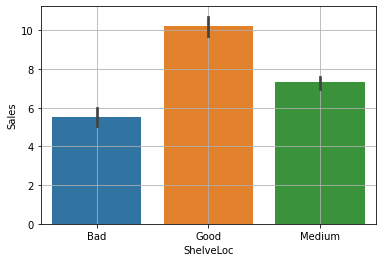

In [40]:
feature = 'ShelveLoc'
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()


2) 수치화 : t-test, anova

In [42]:
bad = data.loc[data[feature]=='Bad', target]
good = data.loc[data[feature]=='Good', target]
medium = data.loc[data[feature]=='Medium', target]

spst.f_oneway(bad, good, medium)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- f통계량 약 92.23이고 pvalue 0에 수렴
- 완전 차이 있다

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

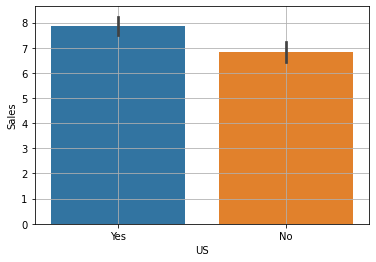

In [43]:
feature='US'
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [47]:
data[feature].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
us_y = data.loc[data[feature]=='Yes', target]
us_n = data.loc[data[feature]=='No', target]
spst.ttest_ind(us_y, us_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 차이가 난다!


### (3) 관계 정리하기

① 강한관계

    ShelveLoc, Price, US

② 중간관계

    Advertising, Age

③ 관계없음

    Population, CompPrice(애매)

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [51]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [56]:
feature = 'Age'
target = 'Survived'

1) 그래프 : histogram, densityplot

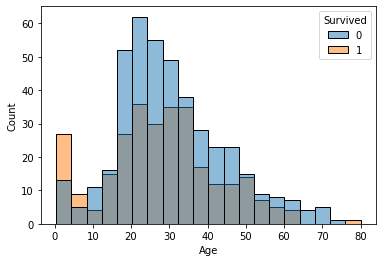

In [57]:
sns.histplot(x=feature, data = titanic, hue = target)
plt.show()

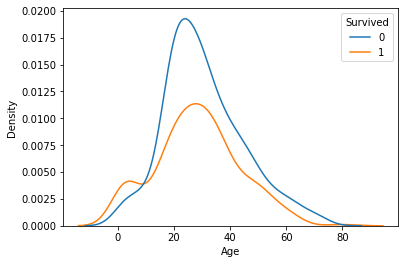

In [58]:
sns.kdeplot(x=feature, data = titanic, hue =target)
plt.show()

#common_norm = True 일 때 (합을 1로 만들고 나머지를 비율로)
# 파란선 S1, 주황선 S2라고 했을 때 S1+S2 = 1


2) 수치화 : 로지스틱회귀

In [61]:

# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(titanic[target], titanic[feature])
result = model.fit()
print(result.pvalues)

# Age옆에 출력된게 pvalue

MissingDataError: exog contains inf or nans

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

2) 수치화 : 로지스틱회귀

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음